# Info

This script plots data from Fermi.

-----------------------
Created by Jerry LaRue, larue@chapman.edu, 9/2018

Last modified by Jerry LaRue, larue@chapman.edu, 12/2018

# Select data

In [1]:
import numpy as np
import h5py
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Button, Layout
from IPython.display import clear_output

##### Definitions #####

def FileList() :
    return [f for f in listdir(FolderPath.value) if isfile(join(FolderPath.value, f))]

def TrimData(x, y, ROI_Min = -np.inf, ROI_Max = np.inf) :
    X_Index_Min = (np.abs(x - ROI_Min)).argmin()
    X_Index_Max = (np.abs(x - ROI_Max)).argmin()
    x = x[X_Index_Min:X_Index_Max]
    if len(y.shape) == 1 :
        y = y[X_Index_Min:X_Index_Max]
    if len(y.shape) == 2 :
        y = np.transpose(y)
        y = y[X_Index_Min:X_Index_Max]
        y = np.transpose(y)
    return x, y

def PlotData(x, y, Labels = '', AxesTitles = ('',''), ErrorBars = [], FigSize = (9,5)) :
    if len(y) == 0 :
        print('Please select data')
    else :
        plt.figure(figsize=FigSize)
        plt.rcParams.update({'font.size': 12})
        if len(y.shape) == 1 :
            if len(ErrorBars) == 0 :
                plt.plot(x, y,'-o', ms=3, lw=1,label=Labels)
            else :
                plt.errorbar(x, y,yerr=ErrorBars, ms=3, lw=1,label=Labels)
            if not Labels == '' :
                plt.legend(), plt.xlabel(AxesTitles[0]), plt.ylabel(AxesTitles[1])
        if len(y.shape) == 2 :
            i = 0
            while i < len(y) :
                if Labels == '' or len(Labels) < len(y) :
                    if len(ErrorBars) != len(y) :
                        plt.plot(x, y[i],'-o', ms=3, lw=1)
                    else :
                        plt.errorbar(x, y[i],ErrorBars[i],ms=3, lw=1)
                else :
                    if len(ErrorBars) != len(y) :
                        plt.plot(x, y[i],'-o', ms=3, lw=1,label=Labels[i])
                    else :
                        plt.errorbar(x, y[i],ErrorBars[i],ms=3, lw=1,label=Labels[i])
                i+=1
            if not Labels == '' or not len(Labels) < len(y) :
                plt.legend(), plt.xlabel(AxesTitles[0]), plt.ylabel(AxesTitles[1])
        plt.show()

def RemoveEmptyDataSets(x, y) :
    remove = np.array([],dtype=int)
    i = 0
    while i < len(y) :
        if np.count_nonzero(np.isnan(y[i])) == len(y[i]) :
            remove = np.append(remove, i)
        i += 1
    y = np.delete(y,remove,axis=0)
    return x, y, remove

##### Select file #####

FolderPath = widgets.Text(
    value='../../Binned/BT2/',
    placeholder='Type file path',
    description='Folder',
    layout=Layout(width='80%'),
    style = {'description_width': '150px'},
    disabled=False
)

FileName = widgets.Dropdown(
    options=FileList(),
    description='File',
    layout=Layout(width='80%'),
    style = {'description_width': '150px'},
    disabled=False,
)

def UpdateFileList(b) :
    FolderPath.value = FolderPath.value.replace('\\','/')
    FileName.options = FileList()

button_UpdateFileList = widgets.Button(description="Update")
button_UpdateFileList.on_click(UpdateFileList)

display(widgets.Box([FolderPath,button_UpdateFileList]))
display(FileName)

C:\Users\larue\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Box(children=(Text(value='../../Binned/BT2/', description='Folder', layout=Layout(width='80%'), placeholder='Type file path', style=DescriptionStyle(description_width='150px')), Button(description='Update', style=ButtonStyle())))

Dropdown(description='File', layout=Layout(width='80%'), options=('XAS_000_000_bin.h5', 'XAS_001_003_bin.h5', 'XAS_005_005_bin.h5', 'XAS_006_006_bin.h5', 'XAS_006_013_bin.h5', 'XAS_009_009_bin.h5', 'XAS_010_010_bin.h5', 'XAS_012_012_bin.h5', 'XAS_012_013_bin.h5', 'XAS_013_013_bin.h5', 'XAS_014_014_bin.h5', 'XAS_014_014_bin_DB.h5', 'XAS_014_020_bin.h5', 'XAS_014_020_bin_fit.h5', 'XAS_017_017_bin.h5', 'XAS_018_018_bin.h5', 'XAS_018_020_bin.h5', 'XAS_019_019_bin.h5', 'XAS_023_023_bin.h5'), style=DescriptionStyle(description_width='150px'), value='XAS_000_000_bin.h5')

# Load data

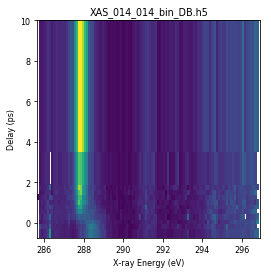

In [2]:
%matplotlib inline

##### Check file #####

if FileName.value == None :
    raise HaltException('Please select file')
    
f = h5py.File(FolderPath.value + '/' + FileName.value, 'r')

# Runs
if not 'runs' in f :
    raise HaltException('Run list missing')

# Energy
if not 'BinnedData/E_bin_centers' in f :
    raise HaltException('Energy values missing')

# Delay
if not 'BinnedData/delays_fs' in f :
    raise HaltException('Delay values missing')

# Intensity
if not 'BinnedData/XAS_2dmatrix' in f :
    raise HaltException('Intensity values missing')

# Error bars
if not 'BinnedData/XAS_2dmatrix_err' in f :
    raise HaltException('Error bar values missing')
    
##### Load data #####

# Runs
Runs = f['runs'][...]

# Energy
Energy = f['BinnedData/E_bin_centers'][...]

# Delay
Delay = f['BinnedData/delays_fs'][...]

# Intensity
Intensity = f['/BinnedData/XAS_2dmatrix'][...]

# Error Bars
ErrorBars = f['/BinnedData/XAS_2dmatrix_err'][...]

f.close()

##### Plot data #####

Energy, Intensity, remove = RemoveEmptyDataSets(Energy, Intensity)
Delay = np.delete(Delay,remove)
ErrorBars = np.nan_to_num(np.delete(ErrorBars,remove,axis=0))

plt.figure(figsize = [4,4])
plt.rcParams.update({'font.size': 8})
plt.title(FileName.value)
if len(Intensity.shape) == 1 :
    plt.plot(Energy, Intensity)
if len(Intensity.shape) == 2 :
    if Intensity.shape[0] == 1 :
        plt.plot(Energy, Intensity[0])
    else :
        plt.pcolor(Energy, Delay/1000, Intensity)
plt.xlabel('X-ray Energy (eV)')
plt.ylabel('Delay (ps)')
plt.show()

In [4]:
%matplotlib notebook

def UpdatePlot_Xas(b) :
    with out_xas :
        clear_output(True)
        x, y = TrimData(Energy, Intensity, ROI_Min.value, ROI_Max.value)
        x, error = TrimData(Energy, ErrorBars, ROI_Min.value, ROI_Max.value)
        if ShowErrorBars.value :
            PlotData(x,y[Select_Delays.index,:],Labels=np.take(Delay,Select_Delays.index),AxesTitles=('Energy (eV)','Intensity(au)'),ErrorBars=error[Select_Delays.index,:])
        else :
            PlotData(x,y[Select_Delays.index,:],Labels=np.take(Delay,Select_Delays.index),AxesTitles=('Energy (eV)','Intensity(au)'))

if len(Delay) < 20 :
    NumberRows = len(Intensity)
else :
    NumberRows = 20

Select_Delays = widgets.SelectMultiple(
    options=Delay,
    style = {'width': '100px','description_width': '150px'},
    rows=NumberRows,
    layout=Layout(width='40%'),
    description='Select delays',
    disabled=False
)

ROI_Min = widgets.BoundedFloatText(
    value=287,
    min=280,
    max=310,
    step=0.1,
    description='ROI Min:',
    layout=Layout(width='18%'),
    disabled=False
)

ROI_Max = widgets.BoundedFloatText(
    value=290,
    min=280,
    max=310,
    step=0.1,
    description='ROI Max:',
    layout=Layout(width='18%'),
    disabled=False
)

ShowErrorBars = widgets.Checkbox(
    value=False,
    description='Error Bars?',
    layout=Layout(width='18%'),
    disabled=False
)

button_UpdatePlot_Xas = widgets.Button(description="Update")
button_UpdatePlot_Xas.on_click(UpdatePlot_Xas)

display(Select_Delays)
display(widgets.Box([button_UpdatePlot_Xas,ROI_Min,ROI_Max,ShowErrorBars]))
out_xas = widgets.Output()
out_xas

SelectMultiple(description='Select delays', layout=Layout(width='40%'), options=(-750.0, -300.0, -50.0, 150.0, 450.0, 690.0, 890.0, 1125.0, 1375.0, 1625.0, 1875.0, 3500.0, 10000.0), rows=13, style=DescriptionStyle(description_width='150px'), value=())

Box(children=(Button(description='Update', style=ButtonStyle()), BoundedFloatText(value=287.0, description='ROI Min:', layout=Layout(width='18%'), max=310.0, min=280.0, step=0.1), BoundedFloatText(value=290.0, description='ROI Max:', layout=Layout(width='18%'), max=310.0, min=280.0, step=0.1), Checkbox(value=False, description='Error Bars?', layout=Layout(width='18%'))))

Output()

# Integrate data

In [5]:
def UpdatePlot_Int(b):
    with out_int:
        clear_output(True)
        x, y = TrimData(Energy, Intensity, Int_Min.value, Int_Max.value)
        np.nan_to_num(y,False)
        PlotData(Delay,sum(np.transpose(y)),str(Int_Min.value)+' - '+str(Int_Max.value),('Delay (fs)','Intensity(au)'))

Int_Min = widgets.BoundedFloatText(
    value=287,
    min=280,
    max=310,
    step=0.1,
    description='ROI Min:',
    layout=Layout(width='18%'),
    disabled=False
)

Int_Max = widgets.BoundedFloatText(
    value=290,
    min=280,
    max=310,
    step=0.1,
    description='ROI Max:',
    layout=Layout(width='18%'),
    disabled=False
)

button_UpdatePlot_Int = widgets.Button(description="Plot")
button_UpdatePlot_Int.on_click(UpdatePlot_Int)

display(widgets.Box([button_UpdatePlot_Int,Int_Min,Int_Max]))
out_int = widgets.Output()
out_int

Box(children=(Button(description='Plot', style=ButtonStyle()), BoundedFloatText(value=287.0, description='ROI Min:', layout=Layout(width='18%'), max=310.0, min=280.0, step=0.1), BoundedFloatText(value=290.0, description='ROI Max:', layout=Layout(width='18%'), max=310.0, min=280.0, step=0.1)))

Output()